# 🔬 Prédiction d'Attaque Cardiaque - Notebook de Traitement

In [26]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import sklearn
print(sklearn.__version__)

1.6.1


In [27]:
# 📥 Chargement des données
df = pd.read_csv("attaque_cardiaque.csv")
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  55.0        0                       748         0                 45   
1  65.0        0                        56         0                 25   
2  45.0        0                       582         1                 38   
3  60.0        1                       754         1                 40   
4  95.0        1                       582         0                 30   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    0  263358.03               1.3           137    1   
1                    0  305000.00               5.0           130    1   
2                    0  319000.00               0.9           140    0   
3                    1  328000.00               1.2           126    1   
4                    0  461000.00               2.0           132    1   

   smoking  time  DEATH_EVENT  
0        1    88            0  
1        0   207            0  
2        0   244            0  
3        0    90            0  
4        0    50            1

In [28]:
# 👁️ Aperçu des données
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB


age      anaemia  creatinine_phosphokinase     diabetes  \
count  5000.000000  5000.000000               5000.000000  5000.000000   
mean     60.288736     0.474400                586.760600     0.439400   
std      11.697243     0.499394                976.733979     0.496364   
min      40.000000     0.000000                 23.000000     0.000000   
25%      50.000000     0.000000                121.000000     0.000000   
50%      60.000000     0.000000                248.000000     0.000000   
75%      68.000000     1.000000                582.000000     1.000000   
max      95.000000     1.000000               7861.000000     1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count        5000.000000          5000.000000    5000.000000   
mean           37.734600             0.364800  265075.404370   
std            11.514855             0.481422   97999.758622   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  215000.000000   
50%            38.000000             0.000000  263358.030000   
75%            45.000000             1.000000  310000.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium          sex      smoking         time  \
count       5000.000000   5000.000000  5000.000000  5000.000000  5000.000000   
mean           1.369106    136.808200     0.645600     0.311800   130.678800   
std            1.009750      4.464236     0.478379     0.463275    77.325928   
min            0.500000    113.000000     0.000000     0.000000     4.000000   
25%            0.900000    134.000000     0.000000     0.000000    74.000000   
50%            1.100000    137.000000     1.000000     0.000000   113.000000   
75%            1.400000    140.000000     1.000000     1.000000   201.000000   
max            9.400000    148.000000     1.000000     1.000000   285.000000   

       DEATH_EVENT  
count  5000.000000  
mean      0.313600  
std       0.464002  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

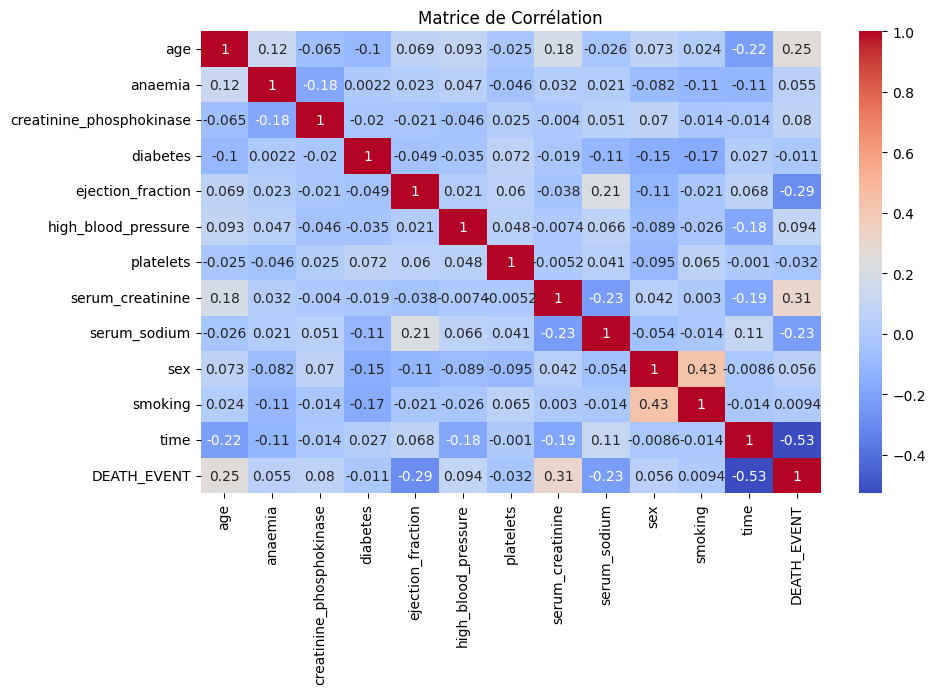

In [29]:
# 📊 Analyse des corrélations
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matrice de Corrélation")
plt.show()

In [30]:
# 🧹 Prétraitement
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
# ⚙️ Entraînement de plusieurs modèles
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier()
}

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"📌 {name} - Accuracy: {acc:.4f}")

best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"✅ Meilleur modèle : {best_model_name}")

📌 Logistic Regression - Accuracy: 0.8510
📌 Random Forest - Accuracy: 0.9920
📌 Support Vector Machine - Accuracy: 0.9490
📌 Decision Tree - Accuracy: 0.9880
✅ Meilleur modèle : Random Forest


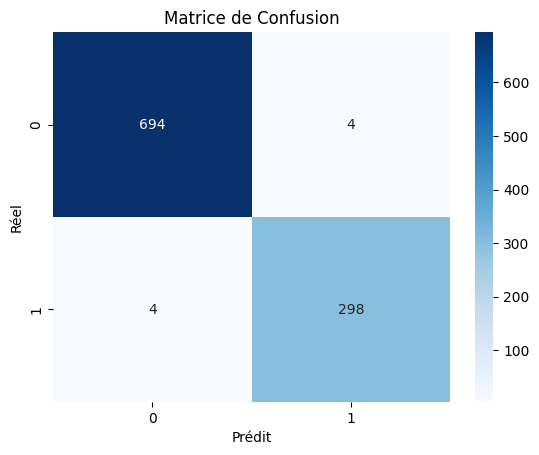

🧾 Rapport de classification :

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       698
           1       0.99      0.99      0.99       302

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



In [32]:
# 📈 Évaluation du meilleur modèle
y_pred = best_model.predict(X_test_scaled)
y_proba = best_model.predict_proba(X_test_scaled)[:,1]

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de Confusion")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()

# Rapport de classification
print("🧾 Rapport de classification :\n")
print(classification_report(y_test, y_pred))

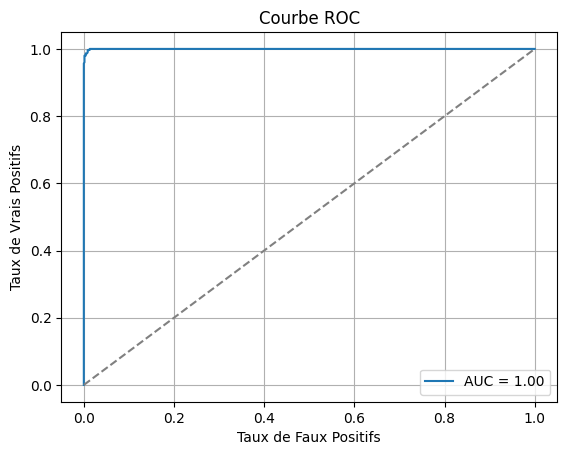

In [33]:
# 📉 Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC")
plt.legend()
plt.grid(True)
plt.show()

In [35]:
import pickle

# Sauvegarder le meilleur modèle
with open("meilleur_modele.pkl", "wb") as f:
    pickle.dump(best_model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [37]:
import pickle

# Sauvegarder le modèle
with open("meilleur_modele.pkl", "wb") as f:
    pickle.dump(model, f)

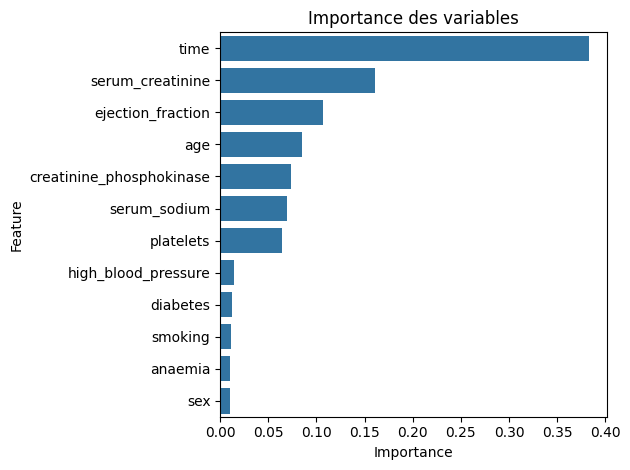

In [38]:
# 🔍 Importance des variables (pour les modèles basés sur les arbres)
if hasattr(best_model, "feature_importances_"):
    importances = best_model.feature_importances_
    features = X.columns
    imp_df = pd.DataFrame({"Feature": features, "Importance": importances})
    imp_df = imp_df.sort_values(by="Importance", ascending=False)

    sns.barplot(x="Importance", y="Feature", data=imp_df)
    plt.title("Importance des variables")
    plt.tight_layout()
    plt.show()

In [39]:
# 📝 Sauvegarde des résultats
with open("resultats_modeles.txt", "w") as f:
    for name, acc in results.items():
        f.write(f"{name} - Accuracy: {acc:.4f}\n")
    f.write(f"\nMeilleur modèle : {best_model_name}\n")
    f.write(classification_report(y_test, y_pred))

In [40]:
# 📤 Export du jeu de données prétraité (normalisé)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_train_scaled_df["DEATH_EVENT"] = y_train.values
X_train_scaled_df.to_csv("data_pretraitee.csv", index=False)

In [41]:
# 🔁 Validation croisée pour évaluer la robustesse
# Import necessary function
from sklearn.model_selection import cross_val_score 

cv_scores = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores[name] = scores
    print(f"{name} - Score CV moyen: {scores.mean():.4f} (écart-type: {scores.std():.4f})")

Logistic Regression - Score CV moyen: 0.8458 (écart-type: 0.0199)
Random Forest - Score CV moyen: 0.9920 (écart-type: 0.0023)
Support Vector Machine - Score CV moyen: 0.9543 (écart-type: 0.0054)
Decision Tree - Score CV moyen: 0.9832 (écart-type: 0.0036)


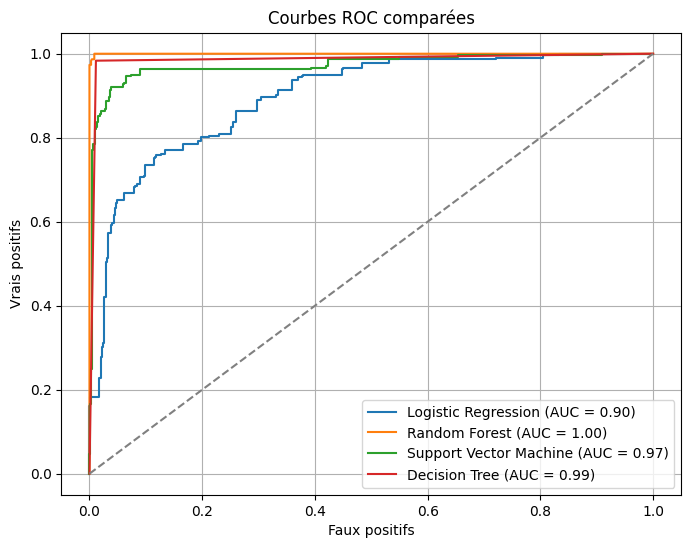

In [42]:
# 📊 Comparaison des courbes ROC
plt.figure(figsize=(8,6))
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test_scaled)[:,1]
    else:
        y_score = model.decision_function(X_test_scaled)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_score):.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("Faux positifs")
plt.ylabel("Vrais positifs")
plt.title("Courbes ROC comparées")
plt.legend()
plt.grid()
plt.savefig("courbes_roc.png")
plt.show()

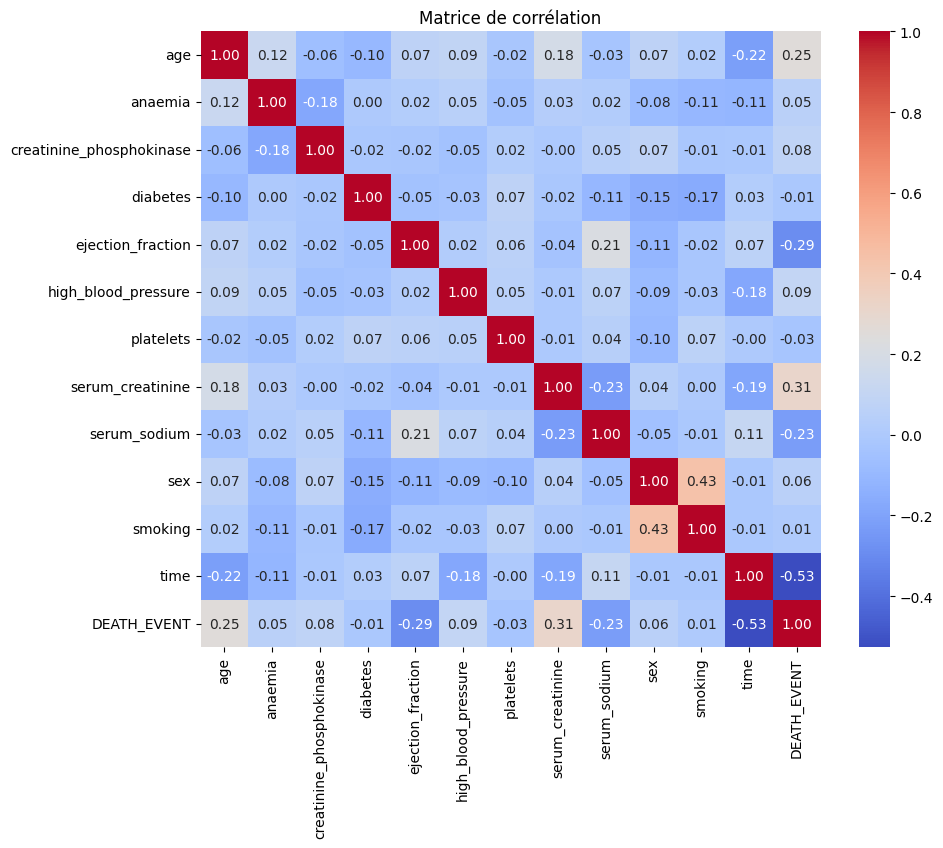

In [43]:
# 🔍 Matrice de corrélation
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

In [44]:
# 🔧 Optimisation d'un modèle avec GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=0), param_grid_rf, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("Meilleurs hyperparamètres :", grid_search.best_params_)
print("Score optimal :", grid_search.best_score_)

best_rf_model = grid_search.best_estimator_

# Évaluation finale
y_pred_gs = best_rf_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_gs))

# Sauvegarde du modèle optimisé
joblib.dump(best_rf_model, "random_forest_optimise.pkl")
print("Modèle RandomForest optimisé sauvegardé sous 'random_forest_optimise.pkl'")

Meilleurs hyperparamètres : {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Score optimal : 0.9922500000000001
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       698
           1       0.99      0.99      0.99       302

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000

Modèle RandomForest optimisé sauvegardé sous 'random_forest_optimise.pkl'



## 🧠 Modélisation avec un Réseau de Neurones Artificiel (ANN)

Dans cette section, nous allons utiliser un modèle de deep learning (ANN) pour prédire les risques d'attaque cardiaque.
Nous allons suivre plusieurs étapes pour construire, entraîner, évaluer et sauvegarder ce modèle.


In [ ]:

# ÉTAPE 1 : Chargement des données
import pandas as pd
df = pd.read_csv("attaque_cardiaque.csv")

# ÉTAPE 2 : Séparation des variables explicatives et de la cible
X = df.drop("target", axis=1)
y = df["target"]

# ÉTAPE 3 : Découpage du jeu de données
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ÉTAPE 4 : Normalisation des données
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ÉTAPE 5 : Définition du modèle ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(16, input_dim=X.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# ÉTAPE 6 : Compilation du modèle
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# ÉTAPE 7 : Entraînement du modèle
model.fit(X_train_scaled, y_train, epochs=50, batch_size=10, verbose=1)

# ÉTAPE 8 : Évaluation sur les données de test
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)

# ÉTAPE 9 : Affichage de la performance
print(f"Accuracy du modèle ANN : {accuracy:.2f}")
print(f"Loss du modèle ANN : {loss:.2f}")

# ÉTAPE 10 : Sauvegarde du modèle et du scaler
import pickle
model.save("ann_model.h5")
with open("ann_model_scaler.pkl", "wb") as f:
    pickle.dump({'scaler': scaler}, f)
